In [101]:
import pandas as pd 
import numpy as np
import math
import json
import sys
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from itertools import combinations

In [102]:
def read_file(file, for_analysis = False):
    df = pd.read_csv(file, header=None, sep=',')
    for column in df.columns:
        if int(df.at[df.index[0],column]) == 0:
            if for_analysis:
                df = df.set_axis(df[[column]].astype(str), axis=0)
            df.drop(column, axis=1, inplace=True)
    to_drop = df.index[0]
    shrunk_df = df.drop(to_drop)
    return shrunk_df

In [103]:
df = read_file("data/iris.csv")
df

,0,1,2,3
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3
8,5.0,3.4,1.5,0.2
9,4.4,2.9,1.4,0.2
10,4.9,3.1,1.5,0.1


### Create Dist Matrix

In [104]:
def euclidean_dist(point, pointArray):
    return np.sqrt(np.sum((pointArray - point) ** 2, axis=1))

In [105]:
def calcDistMatrix(df, distFunctionVect):
    # must be fully numeric and normalized df
    dfarray = np.array(df)
    
    distMatrix = []
    for i, d in enumerate(dfarray):
        # performs Euclidean distance on all elements in data (vectorized)
        dists = distFunctionVect(dfarray[i], dfarray)
        distMatrix.append(dists)
    
    return pd.DataFrame(distMatrix)

In [106]:
dist_matrix = calcDistMatrix(df, euclidean_dist)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.538516,0.509902,0.648074,0.141421,0.616441,0.519615,0.173205,0.921954,0.469042,...,5.019960,4.636809,4.208325,5.257376,5.136146,4.654031,4.276681,4.459821,4.650806,4.140048
1,0.538516,0.000000,0.300000,0.331662,0.608276,1.090871,0.509902,0.424264,0.509902,0.173205,...,5.072475,4.702127,4.180909,5.320714,5.206726,4.700000,4.249706,4.498889,4.718050,4.153312
2,0.509902,0.300000,0.000000,0.244949,0.509902,1.086278,0.264575,0.412311,0.435890,0.316228,...,5.228767,4.868265,4.334743,5.475400,5.353504,4.864155,4.430576,4.661545,4.848711,4.298837
3,0.648074,0.331662,0.244949,0.000000,0.648074,1.166190,0.331662,0.500000,0.300000,0.316228,...,5.104900,4.760252,4.177320,5.349766,5.232590,4.745524,4.288356,4.533211,4.719110,4.149699
4,0.141421,0.608276,0.509902,0.648074,0.000000,0.616441,0.458258,0.223607,0.921954,0.529150,...,5.061620,4.686150,4.246175,5.297169,5.173007,4.701064,4.330127,4.504442,4.678675,4.173727
5,0.616441,1.090871,1.086278,1.166190,0.616441,0.000000,0.994987,0.700000,1.459452,1.009950,...,4.641121,4.249706,3.925557,4.868265,4.739198,4.284857,3.988734,4.102438,4.264974,3.818377
6,0.519615,0.509902,0.264575,0.331662,0.458258,0.994987,0.000000,0.424264,0.547723,0.479583,...,5.152669,4.803124,4.263801,5.397222,5.267827,4.796874,4.384062,4.593474,4.749737,4.217819
7,0.173205,0.424264,0.412311,0.500000,0.223607,0.700000,0.424264,0.000000,0.787401,0.331662,...,4.962862,4.590207,4.120680,5.200961,5.082322,4.598913,4.200000,4.397727,4.589118,4.060788
8,0.921954,0.509902,0.435890,0.300000,0.921954,1.459452,0.547723,0.787401,0.000000,0.556776,...,5.273519,4.938623,4.310452,5.523586,5.406478,4.914265,4.429447,4.701064,4.888763,4.302325
9,0.469042,0.173205,0.316228,0.316228,0.529150,1.009950,0.479583,0.331662,0.556776,0.000000,...,5.033885,4.669047,4.143670,5.274467,5.165269,4.666905,4.220190,4.457578,4.672259,4.106093


### Hcluster Setup

In [107]:
class Leaf:
    def __init__(self, data):
        self.n_type = 'leaf'
        self.height = 0
        self.data = data
        self.str_rep = str(data)

    def __repr__(self):
        return f"type: {self.n_type}, height: {self.height}, data: {self.data}"

    def to_dict(self):
        json_dict = {}
        json_dict["type"] = self.n_type
        json_dict["height"] = self.height
        json_dict["data"] = self.data
        return json_dict

class Node:
    def __init__(self, n_type, height, nodes, str_rep):
        self.n_type = n_type
        self.height = height
        self.nodes = nodes
        self.str_rep = str_rep

    def __repr__(self):
        return f"type: {self.n_type}, height: {self.height}, nodes: {self.nodes}"

    def to_dict(self):
        json_dict = {}
        json_dict["type"] = self.n_type
        json_dict["height"] = self.height
        json_dict["nodes"] = self.nodes
        return json_dict


In [108]:
def min_matrix(dist_matrix):
    min_locs = dist_matrix.idxmin()
    min_row = 0
    min_col = 0
    min_val = np.inf
    for val in min_locs:
        if dist_matrix.at[val, min_locs[val]] < min_val:
            min_col = val
            min_row = min_locs[val]
            min_val = dist_matrix.at[val, min_locs[val]]

    return min_row, min_col, min_val

In [109]:
def generate_starting_clusters(dist_matrix):
    clusters = {0:[]}
    for column in dist_matrix:
        clusters[0].append(column)
    return clusters

In [110]:
def init_dendrogram(dist_matrix):
    dgram = []
    for column in dist_matrix:
        dgram.append(Leaf(column))
    return dgram

### Hcluster (and dist funcs)

In [111]:
def single_link(s, r):
    return np.minimum(s, r)

In [112]:
def complete_link(s, r):
    return np.maximum(s, r)

In [113]:
import copy
import re
import json
def hcluster(dist_matrix, threshold = np.inf, merge_func = single_link):
    for i in range(len(dist_matrix)):
        for j in range(len(dist_matrix)):
            if i == j:
                dist_matrix.iat[i,j]=np.nan #so that 0 isn't always reported as the min val

    clusters = generate_starting_clusters(dist_matrix)
    dgram = init_dendrogram(dist_matrix)
    current_height = 0
    
    while len(clusters[current_height]) > 1:
        
        s, r, min_val = min_matrix(dist_matrix) #s = row, r = column

        # Set up next level of clusters
        clusters[current_height+1] = copy.deepcopy(clusters[current_height])
        clusters[current_height+1].remove(s)
        clusters[current_height+1].remove(r)

        # Create new cluster
        new_cluster = str((s,r)).strip()
        new_cluster = re.sub('[^A-Za-z0-9,()]+','', new_cluster)

        # Insert new cluster
        clusters[current_height+1].insert(0, new_cluster)

        a = next(item for item in dgram if item.str_rep == str(s))
        b = next(item for item in dgram if item.str_rep == str(r))
        
        dgram.append(Node('node', min_val+1, [a.to_dict(), b.to_dict()], new_cluster))
        dgram.remove(a)
        dgram.remove(b)

        
        new_matrix = pd.DataFrame(np.nan, clusters[current_height+1], clusters[current_height+1]) 
        s_values = dist_matrix.loc[s]
        r_values = dist_matrix[r]
        dist_matrix.drop(index=s, inplace=True)
        dist_matrix.drop(columns=r, inplace=True)  
        for j in clusters[current_height]:
            if j != s and j != r:
                new_matrix[j] = dist_matrix[j]
        merge = merge_func(s_values, r_values)
        merge = merge.drop(s)
        merge = merge.drop(r)
        
        new_matrix[new_cluster] = merge
        for i in merge.keys():
            new_matrix.loc[new_cluster].at[i] = merge[i]      

        dist_matrix = copy.deepcopy(new_matrix)
        current_height += 1
    dgram[0].n_type = 'root'
    dgram[0].height += min_val

    dendrogram = dgram[0].to_dict()
    f = open("dendrogram.json",'w')
    json.dump(dendrogram, f, indent = 4)

    if threshold != np.inf:
        cuts = []
        cuts = cut_dgram(dendrogram, threshold)
        return create_final_clusters(cuts)
    else:
        print("Output dendrogram to")


### Cutting dendrogram

In [114]:
def cut_dgram(dgram, threshold):
    s1 = []
    s2 = []

    s1.append(dgram)
    while len(s1) != 0:
        curr = s1.pop()
        
        if curr['height'] >= threshold:
            s1.append(curr['nodes'][0])
            s1.append(curr['nodes'][1])
        else:
            s2.append(curr)

    return s2


In [115]:
def find_leaves(dgram):
    s1 = []
    s2 = []

    s1.append(dgram)
    while len(s1) != 0:
        curr = s1.pop()
        if curr['type']=='node' or curr['type'] == 'root':
            s1.append(curr['nodes'][0])
            s1.append(curr['nodes'][1])
        else:
            s2.append(curr)
     
    # Return all the leaf data
    leaves = []
    for leaf in s2:
        leaves.append(leaf['data'])
    return leaves
        


In [116]:
def create_final_clusters(dgrams):
    cluster = 0
    clusters = {}
    for tree in dgrams:
        result = find_leaves(tree)
        clusters[cluster] = result
        cluster += 1
    return clusters


In [117]:

dist_matrix = calcDistMatrix(df, euclidean_dist)
end_gram_single = hcluster(dist_matrix, 14)
print(end_gram_single)


{0: [41, 22, 14, 15, 44, 33, 32, 16, 31, 20, 36, 13, 46, 21, 19, 6, 11, 25, 2, 47, 3, 29, 30, 37, 34, 9, 12, 1, 45, 42, 38, 8, 48, 10, 49, 39, 7, 4, 40, 0, 17, 27, 28, 35, 26, 23, 43, 24, 5, 18, 131, 117, 106, 98, 60, 93, 57, 109, 108, 134, 135, 118, 122, 105, 87, 68, 62, 114, 130, 107, 119, 100, 64, 85, 79, 73, 78, 91, 63, 61, 69, 80, 81, 89, 53, 90, 88, 94, 99, 96, 95, 92, 82, 67, 55, 66, 84, 71, 76, 77, 86, 52, 50, 97, 74, 54, 75, 65, 58, 51, 56, 59, 149, 70, 138, 127, 126, 123, 146, 113, 142, 101, 121, 133, 83, 72, 115, 136, 148, 145, 141, 103, 116, 137, 132, 128, 104, 147, 110, 111, 139, 112, 124, 143, 120, 140, 144, 102, 125, 129]}


In [118]:
dist_matrix = calcDistMatrix(df, euclidean_dist)
end_gram_comp = hcluster(dist_matrix, 14, complete_link)
print(end_gram_comp)

{0: [130, 107, 102, 125, 129, 118, 122, 105, 131, 117, 135, 109, 111, 146, 126, 123, 133, 83, 72, 134, 149, 70, 138, 127, 114, 121, 113, 142, 101, 119, 87, 68, 97, 74, 73, 78, 91, 63, 85, 51, 56, 75, 65, 76, 58, 54, 86, 52, 50, 77, 115, 147, 110, 139, 112, 145, 141, 108, 103, 116, 137, 104, 132, 128, 144, 140, 143, 120, 124, 136, 148, 100], 1: [60, 98, 93, 57, 106, 71, 61, 67, 92, 82, 99, 94, 88, 96, 95, 66, 84, 55, 90, 62, 59, 89, 53, 69, 80, 81, 64, 79, 16, 33, 32, 15, 14, 44, 46, 21, 19, 18, 5, 31, 20, 48, 10, 36, 41, 35, 25, 1, 45, 12, 37, 34, 9, 11, 29, 30, 24, 39, 7, 49, 27, 28, 0, 17, 40, 4, 43, 26, 23, 22, 6, 2, 3, 47, 42, 13, 38, 8]}


### Analysis code

In [119]:
# gets centroid of numeric dataframe (not normalized)
def calc_centroid(numdf):
    return np.divide(np.sum(np.array(numdf), axis=0),len(numdf))

In [120]:
def calc_SSE(dfarray, c, distFunc):
    return np.sum(np.square(distFunc(c, dfarray)))

In [121]:
def printClusterInfo(clusters, noData=False):
    for clusterInfo in clusters:
        for key in clusterInfo:
            if key == "dataPoints":
                if not noData:
                    print(f"{key}: \n{clusterInfo[key].to_markdown()}")
            else:
                print(f"{key}: {clusterInfo[key]}")
        print('\n')

In [122]:
def analyze_clusters(df, numdf, distFunc):
    clusters=[]
    for i, c in enumerate(df['cluster'].unique()):
        info = {}
        info["clusterID"] = i
        if c is None:
            pnts = df.loc[df['cluster'].isna()]
            info["type"] = "Noise"
        else:
            pnts = df[df['cluster'] == c]
            info["type"] = "Cluster"
        
        numpnts = numdf.loc[pnts.index]
        
        info["centroid"] = calc_centroid(numpnts)
        info["SSE"] = calc_SSE(np.array(numpnts), info["centroid"], distFunc)
        
        dists = distFunc(info["centroid"], np.array(numpnts))
        df.loc[pnts.index, "distToCentroid"] = dists
        pnts = df.loc[pnts.index]
        info["maxDistToCentroid"] = max(dists)
        info["minDistToCentroid"] = min(dists)
        info["avgDistToCentroid"] = np.sum(dists)/len(pnts)
        info["numPoints"] = len(pnts)
        info["dataPoints"] = pnts
        clusters.append(info)
    return clusters

In [123]:
def all_together(file, threshold=np.inf, dist_func=single_link, silent=False, nodata=False):
    df = read_file(file)
    dist_matrix = calcDistMatrix(df, euclidean_dist)
    end_gram = hcluster(dist_matrix, threshold, dist_func)
    dist_matrix = calcDistMatrix(df, euclidean_dist) #hcluster modifies og dist_matrix

    df = read_file(file, for_analysis=True)
    numdf = copy.deepcopy(df)

    if threshold != np.inf:
        cluster_labels=[0]*len(dist_matrix)
        for i in range(len(end_gram)):
            print()
            for idx in end_gram[i]:
                cluster_labels[idx] = i 
        df.insert(len(df.columns), 'cluster', cluster_labels)
        #print(df)
        clusters = analyze_clusters(df, numdf, euclidean_dist)
        if silent == False:
            if nodata == True:
                printClusterInfo(clusters, noData=True)
            else:
                printClusterInfo(clusters)
        return clusters, df    

In [124]:
all_together("data/iris.csv", 3.7, complete_link)





clusterID: 0
type: Cluster
centroid: [5.006 3.418 1.464 0.244]
SSE: 762.02
maxDistToCentroid: 1.2393514432960495
minDistToCentroid: 0.059933296255086886
avgDistToCentroid: 0.48413224966894003
numPoints: 2500
dataPoints: 
|                  |   0 |   1 |   2 |   3 |   cluster |   distToCentroid |
|:-----------------|----:|----:|----:|----:|----------:|-----------------:|
| ('Iris-setosa',) | 5.1 | 3.5 | 1.4 | 0.2 |         3 |        0.146942  |
| ('Iris-setosa',) | 4.9 | 3   | 1.4 | 0.2 |         3 |        0.438169  |
| ('Iris-setosa',) | 4.7 | 3.2 | 1.3 | 0.2 |         3 |        0.412301  |
| ('Iris-setosa',) | 4.6 | 3.1 | 1.5 | 0.2 |         3 |        0.518837  |
| ('Iris-setosa',) | 5   | 3.6 | 1.4 | 0.2 |         3 |        0.19797   |
| ('Iris-setosa',) | 5.4 | 3.9 | 1.7 | 0.4 |         3 |        0.683807  |
| ('Iris-setosa',) | 4.6 | 3.4 | 1.4 | 0.3 |         3 |        0.415201  |
| ('Iris-setosa',) | 5   | 3.4 | 1.5 | 0.2 |         3 |        0.0599333 |
| ('Iris-setosa

([{'clusterID': 0,
   'type': 'Cluster',
   'centroid': array([5.006, 3.418, 1.464, 0.244]),
   'SSE': 762.02,
   'maxDistToCentroid': 1.2393514432960495,
   'minDistToCentroid': 0.059933296255086886,
   'avgDistToCentroid': 0.48413224966894003,
   'numPoints': 2500,
   'dataPoints':                   0    1    2    3  cluster  distToCentroid
   (Iris-setosa,)  5.1  3.5  1.4  0.2        3        0.146942
   (Iris-setosa,)  4.9  3.0  1.4  0.2        3        0.438169
   (Iris-setosa,)  4.7  3.2  1.3  0.2        3        0.412301
   (Iris-setosa,)  4.6  3.1  1.5  0.2        3        0.518837
   (Iris-setosa,)  5.0  3.6  1.4  0.2        3        0.197970
   (Iris-setosa,)  5.4  3.9  1.7  0.4        3        0.683807
   (Iris-setosa,)  4.6  3.4  1.4  0.3        3        0.415201
   (Iris-setosa,)  5.0  3.4  1.5  0.2        3        0.059933
   (Iris-setosa,)  4.4  2.9  1.4  0.2        3        0.800994
   (Iris-setosa,)  4.9  3.1  1.5  0.1        3        0.366595
   (Iris-setosa,)  5.4  3

### Actual Commandline Running

In [125]:
import sys
threshold = 10 

sys.argv = f"hclustering.py ./data/mammal_milk.csv {threshold}".split(" ")

if __name__ == "__main__":
    if len(sys.argv) == 2:
        all_together(sys.argv[1], np.inf, complete_link)
    elif len(sys.argv) == 3:
        all_together(sys.argv[1], float(sys.argv[2]), complete_link)
    else:
        print("Usage: python3 hclustering.py <Filename> [<threshold>]")
        exit(1)
    

    







clusterID: 0
type: Cluster
centroid: [88.5    2.57   2.8    5.68   0.485]
SSE: 59.412249999999965
maxDistToCentroid: 3.4881979588320413
minDistToCentroid: 0.8765414993027995
avgDistToCentroid: 2.3077424120996444
numPoints: 10
dataPoints: 
|                |    1 |   2 |   3 |   4 |    5 |   cluster |   distToCentroid |
|:---------------|-----:|----:|----:|----:|-----:|----------:|-----------------:|
| ('Horse',)     | 90.1 | 2.6 | 1   | 6.9 | 0.35 |         2 |         2.70324  |
| ('Orangutan',) | 88.5 | 1.4 | 3.5 | 6   | 0.24 |         2 |         1.42173  |
| ('Monkey',)    | 88.4 | 2.2 | 2.7 | 6.4 | 0.18 |         2 |         0.876541 |
| ('Donkey',)    | 90.3 | 1.7 | 1.4 | 6.2 | 0.4  |         2 |         2.4969   |
| ('Hippo',)     | 90.4 | 0.6 | 4.5 | 4.4 | 0.1  |         2 |         3.4882   |
| ('Camel',)     | 87.7 | 3.5 | 3.4 | 4.8 | 0.71 |         2 |         1.6401   |
| ('Bison',)     | 86.9 | 4.8 | 1.7 | 5.7 | 0.9  |         2 |         2.98589  |
| ('Llama',)     

### Analysis

## Mammal Milk

In [66]:
for i in range(11, 40, int((40-4)/5)):
    print(f"THRESHOLD: {i}")
    all_together('data/mammal_milk.csv', i, complete_link)

THRESHOLD: 11






clusterID: 0
type: Cluster
centroid: [88.5    2.57   2.8    5.68   0.485]
SSE: 59.412249999999965
maxDistToCentroid: 3.4881979588320413
minDistToCentroid: 0.8765414993027995
avgDistToCentroid: 2.3077424120996444
numPoints: 10
dataPoints: 
|                |    1 |   2 |   3 |   4 |    5 |   cluster |   distToCentroid |
|:---------------|-----:|----:|----:|----:|-----:|----------:|-----------------:|
| ('Horse',)     | 90.1 | 2.6 | 1   | 6.9 | 0.35 |         2 |         2.70324  |
| ('Orangutan',) | 88.5 | 1.4 | 3.5 | 6   | 0.24 |         2 |         1.42173  |
| ('Monkey',)    | 88.4 | 2.2 | 2.7 | 6.4 | 0.18 |         2 |         0.876541 |
| ('Donkey',)    | 90.3 | 1.7 | 1.4 | 6.2 | 0.4  |         2 |         2.4969   |
| ('Hippo',)     | 90.4 | 0.6 | 4.5 | 4.4 | 0.1  |         2 |         3.4882   |
| ('Camel',)     | 87.7 | 3.5 | 3.4 | 4.8 | 0.71 |         2 |         1.6401   |
| ('Bison',)     | 86.9 | 4.8 | 1.7 | 5.7 | 0.9  |         2 |         2.98589  |
| (

In [77]:
all_together('data/mammal_milk.csv', 11, complete_link)







clusterID: 0
type: Cluster
centroid: [88.5    2.57   2.8    5.68   0.485]
SSE: 59.412249999999965
maxDistToCentroid: 3.4881979588320413
minDistToCentroid: 0.8765414993027995
avgDistToCentroid: 2.3077424120996444
numPoints: 10
dataPoints: 
|                |    1 |   2 |   3 |   4 |    5 |   cluster |   distToCentroid |
|:---------------|-----:|----:|----:|----:|-----:|----------:|-----------------:|
| ('Horse',)     | 90.1 | 2.6 | 1   | 6.9 | 0.35 |         2 |         2.70324  |
| ('Orangutan',) | 88.5 | 1.4 | 3.5 | 6   | 0.24 |         2 |         1.42173  |
| ('Monkey',)    | 88.4 | 2.2 | 2.7 | 6.4 | 0.18 |         2 |         0.876541 |
| ('Donkey',)    | 90.3 | 1.7 | 1.4 | 6.2 | 0.4  |         2 |         2.4969   |
| ('Hippo',)     | 90.4 | 0.6 | 4.5 | 4.4 | 0.1  |         2 |         3.4882   |
| ('Camel',)     | 87.7 | 3.5 | 3.4 | 4.8 | 0.71 |         2 |         1.6401   |
| ('Bison',)     | 86.9 | 4.8 | 1.7 | 5.7 | 0.9  |         2 |         2.98589  |
| ('Llama',)     

([{'clusterID': 0,
   'type': 'Cluster',
   'centroid': array([88.5  ,  2.57 ,  2.8  ,  5.68 ,  0.485]),
   'SSE': 59.412249999999965,
   'maxDistToCentroid': 3.4881979588320413,
   'minDistToCentroid': 0.8765414993027995,
   'avgDistToCentroid': 2.3077424120996444,
   'numPoints': 10,
   'dataPoints':                  1    2    3    4     5  cluster  distToCentroid
   (Horse,)      90.1  2.6  1.0  6.9  0.35        2        2.703243
   (Orangutan,)  88.5  1.4  3.5  6.0  0.24        2        1.421733
   (Monkey,)     88.4  2.2  2.7  6.4  0.18        2        0.876541
   (Donkey,)     90.3  1.7  1.4  6.2  0.40        2        2.496903
   (Hippo,)      90.4  0.6  4.5  4.4  0.10        2        3.488198
   (Camel,)      87.7  3.5  3.4  4.8  0.71        2        1.640099
   (Bison,)      86.9  4.8  1.7  5.7  0.90        2        2.985888
   (Llama,)      86.5  3.9  3.2  5.6  0.80        2        2.456527
   (Mule,)       90.0  2.0  1.8  5.5  0.47        2        1.899349
   (Zebra,)      86

## 4 clusters





clusterID: 0
type: Cluster
centroid: [41.11111111 41.77777778]
SSE: 86.44444444444443
maxDistToCentroid: 4.275973645531965
minDistToCentroid: 0.7856742013183874
avgDistToCentroid: 2.9117006199139848
numPoints: 9
dataPoints: 
|    |   0 |   1 |   cluster |   distToCentroid |
|---:|----:|----:|----------:|-----------------:|
|  1 |  41 |  45 |         1 |         3.22414  |
|  2 |  39 |  44 |         1 |         3.06514  |
|  3 |  42 |  43 |         1 |         1.51127  |
|  4 |  44 |  43 |         1 |         3.1368   |
|  6 |  38 |  42 |         1 |         3.11904  |
|  8 |  41 |  41 |         1 |         0.785674 |
| 10 |  45 |  40 |         1 |         4.27597  |
| 12 |  38 |  39 |         1 |         4.17074  |
| 13 |  42 |  39 |         1 |         2.91653  |


clusterID: 1
type: Cluster
centroid: [11.91666667 37.83333333]
SSE: 390.58333333333337
maxDistToCentroid: 13.08439486139458
minDistToCentroid: 0.18633899812498061
avgDistToCentroid: 4.836295539238221
numPoints: 12
dataP

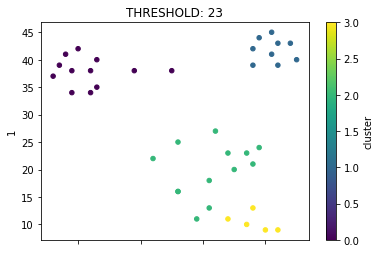

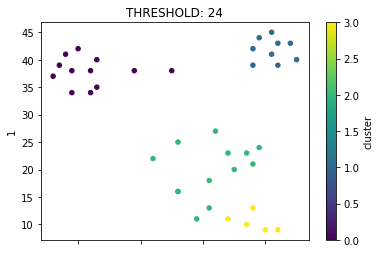

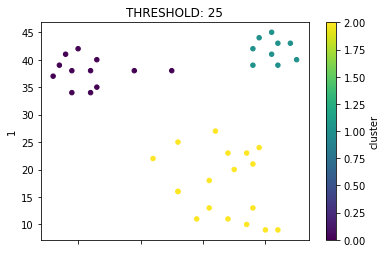

In [68]:
for i in range(23, 26):
    title = f"THRESHOLD: {i}"
    cl, mdf = all_together('data/4clusters.csv', i, complete_link, silent = False)
    mdf.plot.scatter(x=0,y=1,c='cluster',colormap='viridis', title=title)





clusterID: 0
type: Cluster
centroid: [41.11111111 41.77777778]
SSE: 86.44444444444443
maxDistToCentroid: 4.275973645531965
minDistToCentroid: 0.7856742013183874
avgDistToCentroid: 2.9117006199139848
numPoints: 9
dataPoints: 
|    |   0 |   1 |   cluster |   distToCentroid |
|---:|----:|----:|----------:|-----------------:|
|  1 |  41 |  45 |         1 |         3.22414  |
|  2 |  39 |  44 |         1 |         3.06514  |
|  3 |  42 |  43 |         1 |         1.51127  |
|  4 |  44 |  43 |         1 |         3.1368   |
|  6 |  38 |  42 |         1 |         3.11904  |
|  8 |  41 |  41 |         1 |         0.785674 |
| 10 |  45 |  40 |         1 |         4.27597  |
| 12 |  38 |  39 |         1 |         4.17074  |
| 13 |  42 |  39 |         1 |         2.91653  |


clusterID: 1
type: Cluster
centroid: [11.91666667 37.83333333]
SSE: 390.58333333333337
maxDistToCentroid: 13.08439486139458
minDistToCentroid: 0.18633899812498061
avgDistToCentroid: 4.836295539238221
numPoints: 12
dataP

<AxesSubplot:title={'center':'4Clusters, Threshold 23'}, xlabel='0', ylabel='1'>

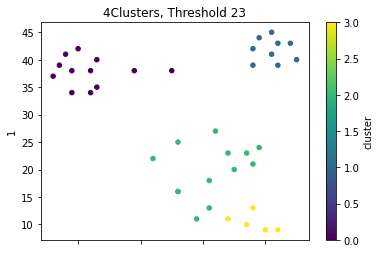

In [69]:
clusters, mdf = all_together('data/4clusters.csv', 23, complete_link, silent=False)
mdf.plot.scatter(x=0,y=1,c='cluster',colormap='viridis', title = "4Clusters, Threshold 23")

## Accidents Set 1







clusterID: 0
type: Cluster
centroid: [ 5.  14.5  1. ]
SSE: 0.5
maxDistToCentroid: 0.5
minDistToCentroid: 0.5
avgDistToCentroid: 0.5
numPoints: 2


clusterID: 1
type: Cluster
centroid: [ 5. 11.  1.]
SSE: 2.0
maxDistToCentroid: 1.0
minDistToCentroid: 0.0
avgDistToCentroid: 0.6666666666666666
numPoints: 3


clusterID: 2
type: Cluster
centroid: [5.  8.2 1. ]
SSE: 2.8000000000000003
maxDistToCentroid: 1.1999999999999993
minDistToCentroid: 0.1999999999999993
avgDistToCentroid: 0.6399999999999999
numPoints: 5


clusterID: 3
type: Cluster
centroid: [ 2. 19.  2.]
SSE: 0.0
maxDistToCentroid: 0.0
minDistToCentroid: 0.0
avgDistToCentroid: 0.0
numPoints: 1


clusterID: 4
type: Cluster
centroid: [2.  2.5 1.5]
SSE: 9.000000000000002
maxDistToCentroid: 1.5811388300841898
minDistToCentroid: 0.7071067811865476
avgDistToCentroid: 1.1441228056353687
numPoints: 6


clusterID: 5
type: Cluster
centroid: [2.  5.  3.5]
SSE: 0.5
maxDistToCentroid: 0.5
minDistToCentroid: 0.5
avgDistToCentroid: 0.5
numPoint

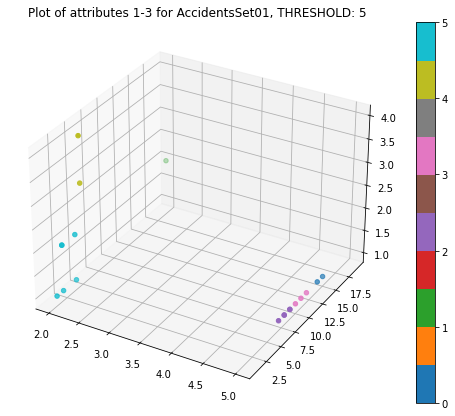

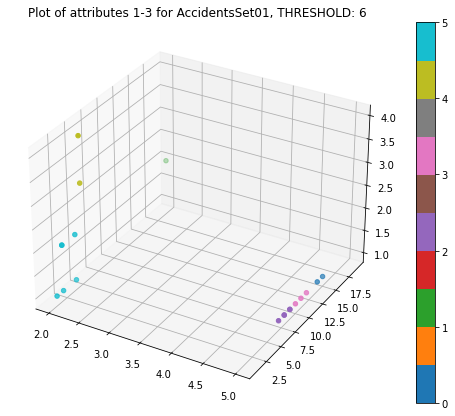

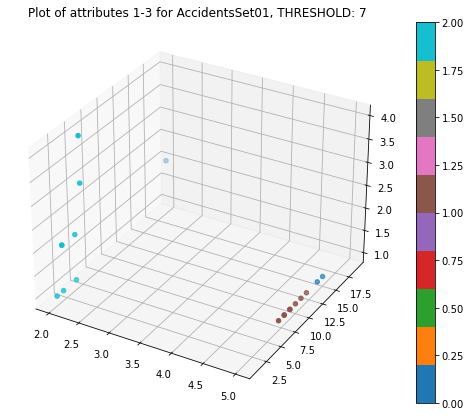

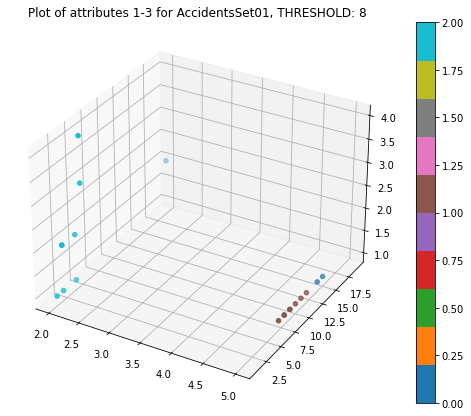

In [70]:
for i in range(5, 9, 1):
    title = f"THRESHOLD: {i}"
    cl, df = all_together('data/AccidentsSet01.csv', i, complete_link, silent=False, nodata=True)
    print(df)
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    cb = ax.scatter3D(df[0], df[1], df[2], c=df['cluster'], cmap='tab10')
    plt.colorbar(cb)
    plt.title(f"Plot of attributes 1-3 for AccidentsSet01, " + title)




clusterID: 0
type: Cluster
centroid: [ 5.  10.3  1. ]
SSE: 64.1
maxDistToCentroid: 4.699999999999999
minDistToCentroid: 0.3000000000000007
avgDistToCentroid: 2.16
numPoints: 10
dataPoints: 
|    |   0 |   1 |   2 |   cluster |   distToCentroid |
|---:|----:|----:|----:|----------:|-----------------:|
|  1 |   5 |  15 |   1 |         2 |              4.7 |
|  2 |   5 |  14 |   1 |         2 |              3.7 |
|  3 |   5 |  12 |   1 |         2 |              1.7 |
|  4 |   5 |  11 |   1 |         2 |              0.7 |
|  5 |   5 |  10 |   1 |         2 |              0.3 |
|  6 |   5 |   9 |   1 |         2 |              1.3 |
|  7 |   5 |   9 |   1 |         2 |              1.3 |
|  8 |   5 |   8 |   1 |         2 |              2.3 |
|  9 |   5 |   8 |   1 |         2 |              2.3 |
| 10 |   5 |   7 |   1 |         2 |              3.3 |


clusterID: 1
type: Cluster
centroid: [ 2. 19.  2.]
SSE: 0.0
maxDistToCentroid: 0.0
minDistToCentroid: 0.0
avgDistToCentroid: 0.0
numP

Text(0.5, 0.92, 'Plot of attributes 1-3 for AccidentsSet01, THRESHOLD: 5')

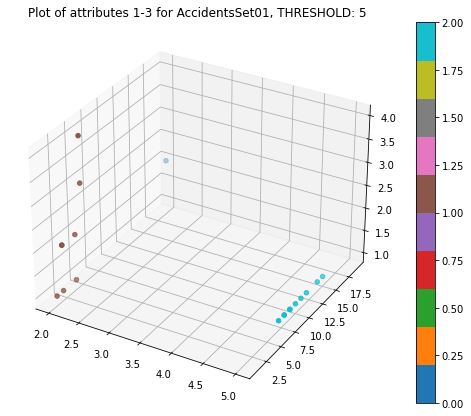

In [34]:
    i = 5
    title = f"THRESHOLD: {i}"
    cl, df = all_together('data/AccidentsSet01.csv', i, single_link, silent=False, nodata=False)

    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    cb = ax.scatter3D(df[0], df[1], df[2], c=df['cluster'], cmap='tab10')
    plt.colorbar(cb)
    plt.title(f"Plot of attributes 1-3 for AccidentsSet01, " + title)

## Accidents Set 3

In [72]:
i=5
title = f"THRESHOLD: {i}"
all_together('data/AccidentsSet03.csv', i, complete_link, silent=False, nodata=False)





clusterID: 0
type: Cluster
centroid: [3.46666667 0.13333333 3.2        1.         0.46666667]
SSE: 29.600000000000005
maxDistToCentroid: 1.8147543451754933
minDistToCentroid: 1.0456258094238746
avgDistToCentroid: 1.3742091576007391
numPoints: 15
dataPoints: 
|    |   0 |   1 |   2 |   3 |   4 |   cluster |   distToCentroid |
|---:|----:|----:|----:|----:|----:|----------:|-----------------:|
|  1 |   3 |   0 |   2 |   1 |   0 |         1 |          1.37598 |
|  2 |   5 |   0 |   4 |   1 |   1 |         1 |          1.81475 |
|  3 |   5 |   0 |   4 |   1 |   0 |         1 |          1.79629 |
|  5 |   3 |   0 |   2 |   1 |   1 |         1 |          1.4     |
|  6 |   4 |   0 |   4 |   1 |   0 |         1 |          1.07703 |
|  8 |   4 |   0 |   2 |   1 |   0 |         1 |          1.4     |
| 10 |   3 |   1 |   2 |   1 |   0 |         1 |          1.6207  |
| 11 |   3 |   1 |   2 |   1 |   1 |         1 |          1.64114 |
| 12 |   4 |   0 |   2 |   1 |   0 |         1 |         

([{'clusterID': 0,
   'type': 'Cluster',
   'centroid': array([3.46666667, 0.13333333, 3.2       , 1.        , 0.46666667]),
   'SSE': 29.600000000000005,
   'maxDistToCentroid': 1.8147543451754933,
   'minDistToCentroid': 1.0456258094238746,
   'avgDistToCentroid': 1.3742091576007391,
   'numPoints': 15,
   'dataPoints':       0    1    2    3    4  cluster  distToCentroid
   1   3.0  0.0  2.0  1.0  0.0        1        1.375984
   2   5.0  0.0  4.0  1.0  1.0        1        1.814754
   3   5.0  0.0  4.0  1.0  0.0        1        1.796292
   5   3.0  0.0  2.0  1.0  1.0        1        1.400000
   6   4.0  0.0  4.0  1.0  0.0        1        1.077033
   8   4.0  0.0  2.0  1.0  0.0        1        1.400000
   10  3.0  1.0  2.0  1.0  0.0        1        1.620699
   11  3.0  1.0  2.0  1.0  1.0        1        1.641138
   12  4.0  0.0  2.0  1.0  0.0        1        1.400000
   14  3.0  0.0  4.0  1.0  1.0        1        1.077033
   15  3.0  0.0  4.0  1.0  0.0        1        1.045626
   18  

In [73]:
cl, df = all_together('data/AccidentsSet03.csv', 3, complete_link, silent=True, nodata=True)
test = df.drop('distToCentroid', axis=1)
test = test.drop('cluster', axis=1)
#print(test)
#pd.plotting.scatter_matrix(test, alpha=0.5, figsize=(20, 20))

## Iris

In [74]:
    cd, mdf = all_together('data/iris.csv', 3.5, complete_link)





clusterID: 0
type: Cluster
centroid: [5.006 3.418 1.464 0.244]
SSE: 762.02
maxDistToCentroid: 1.2393514432960495
minDistToCentroid: 0.059933296255086886
avgDistToCentroid: 0.48413224966894003
numPoints: 2500
dataPoints: 
|                  |   0 |   1 |   2 |   3 |   cluster |   distToCentroid |
|:-----------------|----:|----:|----:|----:|----------:|-----------------:|
| ('Iris-setosa',) | 5.1 | 3.5 | 1.4 | 0.2 |         3 |        0.146942  |
| ('Iris-setosa',) | 4.9 | 3   | 1.4 | 0.2 |         3 |        0.438169  |
| ('Iris-setosa',) | 4.7 | 3.2 | 1.3 | 0.2 |         3 |        0.412301  |
| ('Iris-setosa',) | 4.6 | 3.1 | 1.5 | 0.2 |         3 |        0.518837  |
| ('Iris-setosa',) | 5   | 3.6 | 1.4 | 0.2 |         3 |        0.19797   |
| ('Iris-setosa',) | 5.4 | 3.9 | 1.7 | 0.4 |         3 |        0.683807  |
| ('Iris-setosa',) | 4.6 | 3.4 | 1.4 | 0.3 |         3 |        0.415201  |
| ('Iris-setosa',) | 5   | 3.4 | 1.5 | 0.2 |         3 |        0.0599333 |
| ('Iris-setosa

## Many Clusters

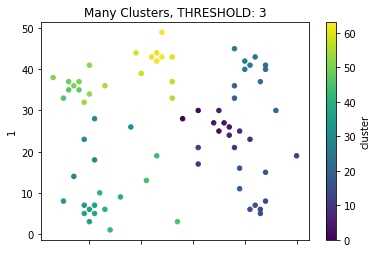

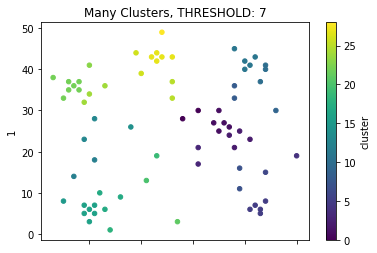

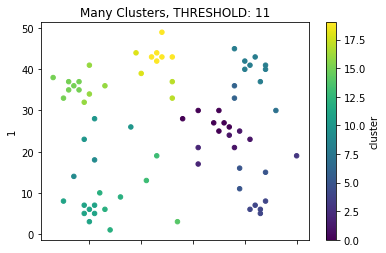

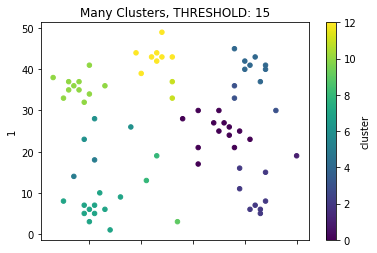

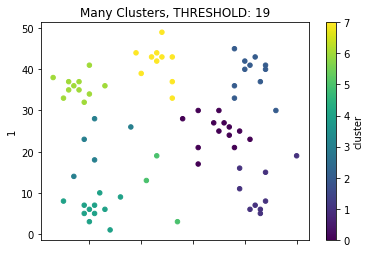

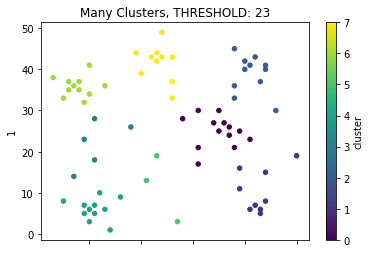

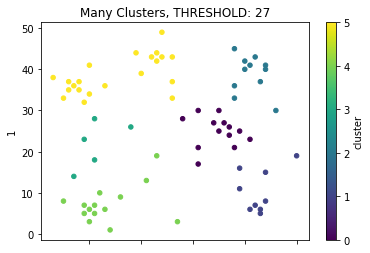

In [75]:
for i in range(3, 30, int((51-3)/10)):
    title=f"THRESHOLD: {i}"
    cl, mdf = all_together('data/many_clusters.csv', i, complete_link, silent=True)
    mdf.plot.scatter(x=0,y=1,c='cluster',colormap='viridis', title = "Many Clusters, " + title)









clusterID: 0
type: Cluster
centroid: [23.3 41.7]
SSE: 228.2
maxDistToCentroid: 9.109335870413389
minDistToCentroid: 0.424264068711927
avgDistToCentroid: 4.005879958716356
numPoints: 10
dataPoints: 
|    |   0 |   1 |   cluster |   distToCentroid |
|---:|----:|----:|----------:|-----------------:|
|  1 |  24 |  49 |         7 |         7.33348  |
|  3 |  19 |  44 |         7 |         4.87647  |
|  4 |  23 |  44 |         7 |         2.31948  |
|  5 |  22 |  43 |         7 |         1.83848  |
|  6 |  24 |  43 |         7 |         1.47648  |
|  7 |  26 |  43 |         7 |         2.99666  |
|  9 |  23 |  42 |         7 |         0.424264 |
| 16 |  20 |  39 |         7 |         4.2638   |
| 20 |  26 |  37 |         7 |         5.42033  |
| 29 |  26 |  33 |         7 |         9.10934  |


clusterID: 1
type: Cluster
centroid: [41.27272727 38.90909091]
SSE: 277.09090909090907
maxDistToCentroid: 10.08558418062448
minDistToCentroid: 1.676280810416891
avgDistToCentroid: 4.3967948885

<AxesSubplot:title={'center':'Many Clusters, THRESHOLD: 23'}, xlabel='0', ylabel='1'>

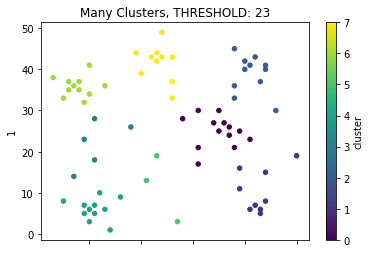

In [76]:
    i = 23
    title=f"THRESHOLD: {i}"
    cl, mdf = all_together('data/many_clusters.csv', i, complete_link, silent=False)
    mdf.plot.scatter(x=0,y=1,c='cluster',colormap='viridis', title = "Many Clusters, " + title)